In [7]:
%load_ext autoreload
%autoreload 2
import cbc, numpy as np, matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
waist = 4e-6
wavelength = 1.5e-7
a, b, c = 2e-5, 2.5e-5, 3e-5
Nx, Ny, Nz = 20, 20, 21
detNx, detNy = 512, 512
pix_size = 55e-3 / 4
det_dist = 54

In [9]:
axis = np.random.rand(3)
theta = 2 * np.pi * np.random.random()

In [10]:
latargs = cbc.lat_args(a=a, b=b, c=c, Nx=Nx, Ny=Ny, Nz=Nz)
koutargs = cbc.kout_args(det_dist=det_dist, detNx=detNx, detNy=detNy, pix_size=pix_size)
diff = cbc.diff(lat_args=latargs, kout_args=koutargs, waist=waist, wavelength=wavelength)
# diff.move_lat()

In [11]:
def Rs(pts, waist=1e-4, wavelength=1.5e-7):
    """
    Return incoming wavevector of gaussian beam for given coordinate (x, y, z).

    waist - beam waist radius
    wavelength - light wavelength

    Return a np.array of three incoming wavevector coordinates.
    """
    k = 2 * np.pi / wavelength
    zr = k * waist**2 / 2
    xs, ys, zs = pts.T
    Rs = zs + zr**2 / zs
    return Rs

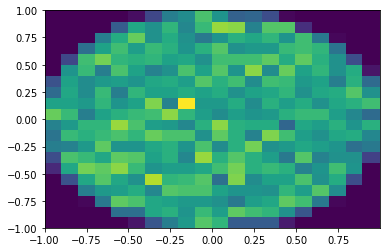

In [14]:
%matplotlib inline
kins = cbc.uniform(10000).T
plt.hist2d(*kins, 20)
plt.show()